# 라이브러리 불러오기

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## 한글폰트 적용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

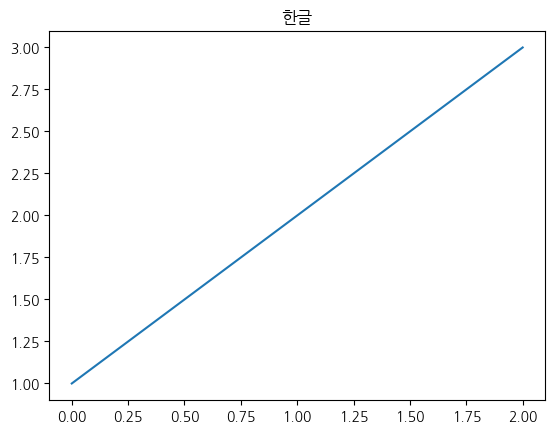

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' # 나눔바른고딕 적용하기
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

## 데이터 불러오기(11년도 혼잡도)

In [ ]:
# 엑셀 파일에서 모든 시트를 읽어서 딕셔너리 형태로 저장
excel_file = pd.ExcelFile('/content/drive/MyDrive/세미 프로젝트/2011년 혼잡도.xls')
sheet_names = excel_file.sheet_names  # 시트 이름 목록
sheet_names

['평일 상선', '평일 하선', '토요일 상선', '토요일 하선', '일요일 상선', '일요일 하선']

## 데이터 형식 맞추기
- 요일구분 / 호선 / 역명 / 상하구분 / 시간대

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선      4 non-null      object
 1   역명      123 non-null    object
 2   방향      123 non-null    object
 3   5시대     123 non-null    int64 
 4   6시대     123 non-null    int64 
 5   7시대     123 non-null    int64 
 6   8시대     123 non-null    int64 
 7   9시대     123 non-null    int64 
 8   10시대    123 non-null    int64 
 9   11시대    123 non-null    int64 
 10  12시대    123 non-null    int64 
 11  13시대    123 non-null    int64 
 12  14시대    123 non-null    int64 
 13  15시대    123 non-null    int64 
 14  16시대    123 non-null    int64 
 15  17시대    123 non-null    int64 
 16  18시대    123 non-null    int64 
 17  19시대    123 non-null    int64 
 18  20시대    123 non-null    int64 
 19  21시대    123 non-null    int64 
 20  22시대    123 non-null    int64 
 21  23시대    123 non-null    int64 
 22  24시대    123 non-null    in

In [ ]:
# 모든 시트의 데이터를 저장할 빈 리스트를 생성
all_dfs = []

for sheet_name in sheet_names:
    # 필요한 행부터 읽기 시작
    df = pd.read_excel(excel_file, sheet_name=sheet_name, header=2)

    # 불필요한 열 삭제
    df.dropna(axis=1, how='all', inplace=True)

    # 요일구분 컬럼 추가
    day_of_week = sheet_name.split()[-2]  # 시트 이름에서 요일 정보 추출
    df['요일구분'] = day_of_week

    # 데이터프레임을 리스트에 추가
    all_dfs.append(df)

In [ ]:
all_dfs

[      호선       역명  방향  5시대  6시대  7시대  8시대  9시대  10시대  11시대  ...  16시대  17시대  \
 0    1호선    서울역.1  상선    8   16   44   76   54    38    40  ...    30    34   
 1    NaN     시청.1  상선    8   16   39   69   55    43    45  ...    39    42   
 2    NaN       종각  상선    9   13   28   53   45    40    41  ...    44    45   
 3    NaN   종로3가.1  상선    9   13   31   57   49    45    47  ...    55    56   
 4    NaN     종로5가  상선    8   12   26   46   43    40    42  ...    56    58   
 ..   ...      ...  ..  ...  ...  ...  ...  ...   ...   ...  ...   ...   ...   
 118  NaN     이촌.4  상선   15   23   44   77   44    35    37  ...    39    39   
 119  NaN       동작  상선   15   25   48   73   46    31    40  ...    36    39   
 120  NaN  총신대입구.4  상선   16   27   50   79   42    32    40  ...    36    37   
 121  NaN     사당.4  상선   20   25   51   77   45    33    40  ...    38    39   
 122  NaN      남태령  상선   21   36  107  135   93    59    66  ...    65    60   
 
      18시대  19시대  20시대  21시대  22시대  23

In [ ]:
df_14

,호선,역명,방향,05시~06시,06시~07시,07시~08시,08시~09시,09시~10시,10시~11시,11시~12시,...,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~01시,요일구분,상하구분
0,1호선,서울역.1,상선,8,16,44,76,54,38,40,...,34,49,36,26,21,21,12,4,평일,상선
1,NaN,시청.1,상선,8,16,39,69,55,43,45,...,42,68,49,38,31,31,20,5,평일,상선
2,NaN,종각,상선,9,13,28,53,45,40,41,...,45,79,57,46,41,42,25,7,평일,상선
3,NaN,종로3가.1,상선,9,13,31,57,49,45,47,...,56,97,71,57,49,53,31,8,평일,상선
4,NaN,종로5가,상선,8,12,26,46,43,40,42,...,58,102,75,59,51,56,32,8,평일,상선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,NaN,이촌.4,하선,27,9,7,12,23,25,24,...,40,35,30,29,35,32,23,0,일요일,하선
734,NaN,동작,하선,0,11,7,12,24,26,25,...,40,36,33,30,33,34,23,0,일요일,하선
735,NaN,총신대입구.4,하선,0,12,8,14,27,31,28,...,40,36,32,30,33,32,22,0,일요일,하선
736,NaN,사당.4,하선,11,12,8,17,30,39,29,...,34,30,29,26,30,26,20,4,일요일,하선


In [ ]:
df_14.rename(columns={'방향':'상하구분'}, inplace=True)
df_14.head(1)

,호선,역명,상하구분,05시~06시,06시~07시,07시~08시,08시~09시,09시~10시,10시~11시,11시~12시,...,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~01시,요일구분
0,1호선,서울역.1,상선,8,16,44,76,54,38,40,...,30,34,49,36,26,21,21,12,4,평일


In [ ]:
# 리스트에 있는 모든 데이터프레임을 합치기
df_14 = pd.concat(all_dfs, ignore_index=True)

In [ ]:
df_14.info

<bound method DataFrame.info of       호선       역명  방향  5시대  6시대  7시대  8시대  9시대  10시대  11시대  ...  16시대  17시대  \
0    1호선    서울역.1  상선    8   16   44   76   54    38    40  ...    30    34   
1    NaN     시청.1  상선    8   16   39   69   55    43    45  ...    39    42   
2    NaN       종각  상선    9   13   28   53   45    40    41  ...    44    45   
3    NaN   종로3가.1  상선    9   13   31   57   49    45    47  ...    55    56   
4    NaN     종로5가  상선    8   12   26   46   43    40    42  ...    56    58   
..   ...      ...  ..  ...  ...  ...  ...  ...   ...   ...  ...   ...   ...   
733  NaN     이촌.4  하선   27    9    7   12   23    25    24  ...    39    40   
734  NaN       동작  하선    0   11    7   12   24    26    25  ...    40    40   
735  NaN  총신대입구.4  하선    0   12    8   14   27    31    28  ...    39    40   
736  NaN     사당.4  하선   11   12    8   17   30    39    29  ...    34    34   
737  NaN      남태령  하선   11   24   17   26   50    78    55  ...    67    69   

     18시대  19시대  20

In [ ]:
# 시간대 컬럼 이름 변경
new_columns = {
    '5시대': '05시~06시', '6시대': '06시~07시', '7시대': '07시~08시', '8시대': '08시~09시', '9시대': '09시~10시',
    '10시대': '10시~11시', '11시대': '11시~12시', '12시대': '12시~13시', '13시대': '13시~14시', '14시대': '14시~15시',
    '15시대': '15시~16시', '16시대': '16시~17시', '17시대': '17시~18시', '18시대': '18시~19시', '19시대': '19시~20시',
    '20시대': '20시~21시', '21시대': '21시~22시', '22시대': '22시~23시', '23시대': '23시~24시', '24시대': '24시~01시'
}

df_14.rename(columns=new_columns, inplace=True)

In [ ]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   호선       24 non-null     object
 1   역명       738 non-null    object
 2   상하구분     738 non-null    object
 3   05시~06시  738 non-null    int64 
 4   06시~07시  738 non-null    int64 
 5   07시~08시  738 non-null    int64 
 6   08시~09시  738 non-null    int64 
 7   09시~10시  738 non-null    int64 
 8   10시~11시  738 non-null    int64 
 9   11시~12시  738 non-null    int64 
 10  12시~13시  738 non-null    int64 
 11  13시~14시  738 non-null    int64 
 12  14시~15시  738 non-null    int64 
 13  15시~16시  738 non-null    int64 
 14  16시~17시  738 non-null    int64 
 15  17시~18시  738 non-null    int64 
 16  18시~19시  738 non-null    int64 
 17  19시~20시  738 non-null    int64 
 18  20시~21시  738 non-null    int64 
 19  21시~22시  738 non-null    int64 
 20  22시~23시  738 non-null    int64 
 21  23시~24시  738 non-null    int64 
 22  24

In [ ]:
# 컬럼 순서 변경
new_column_order = ['요일구분', '호선', '역명', '상하구분', '05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시', '10시~11시', '11시~12시',
                    '12시~13시', '13시~14시', '14시~15시', '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시', '20시~21시',
                    '21시~22시', '22시~23시', '23시~24시', '24시~01시']

df_14 = df_14.loc[:, new_column_order]

In [ ]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   요일구분     738 non-null    object
 1   호선       24 non-null     object
 2   역명       738 non-null    object
 3   상하구분     738 non-null    object
 4   05시~06시  738 non-null    int64 
 5   06시~07시  738 non-null    int64 
 6   07시~08시  738 non-null    int64 
 7   08시~09시  738 non-null    int64 
 8   09시~10시  738 non-null    int64 
 9   10시~11시  738 non-null    int64 
 10  11시~12시  738 non-null    int64 
 11  12시~13시  738 non-null    int64 
 12  13시~14시  738 non-null    int64 
 13  14시~15시  738 non-null    int64 
 14  15시~16시  738 non-null    int64 
 15  16시~17시  738 non-null    int64 
 16  17시~18시  738 non-null    int64 
 17  18시~19시  738 non-null    int64 
 18  19시~20시  738 non-null    int64 
 19  20시~21시  738 non-null    int64 
 20  21시~22시  738 non-null    int64 
 21  22시~23시  738 non-null    int64 
 22  23

In [ ]:
df_14

,요일구분,호선,역명,상하구분,05시~06시,06시~07시,07시~08시,08시~09시,09시~10시,10시~11시,...,15시~16시,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~01시
0,평일,1호선,서울역.1,상선,8,16,44,76,54,38,...,29,30,34,49,36,26,21,21,12,4
1,평일,NaN,시청.1,상선,8,16,39,69,55,43,...,33,39,42,68,49,38,31,31,20,5
2,평일,NaN,종각,상선,9,13,28,53,45,40,...,36,44,45,79,57,46,41,42,25,7
3,평일,NaN,종로3가.1,상선,9,13,31,57,49,45,...,43,55,56,97,71,57,49,53,31,8
4,평일,NaN,종로5가,상선,8,12,26,46,43,40,...,42,56,58,102,75,59,51,56,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,일요일,NaN,이촌.4,하선,27,9,7,12,23,25,...,38,39,40,35,30,29,35,32,23,0
734,일요일,NaN,동작,하선,0,11,7,12,24,26,...,39,40,40,36,33,30,33,34,23,0
735,일요일,NaN,총신대입구.4,하선,0,12,8,14,27,31,...,38,39,40,36,32,30,33,32,22,0
736,일요일,NaN,사당.4,하선,11,12,8,17,30,39,...,33,34,34,30,29,26,30,26,20,4


In [ ]:
for index, row in df_14.iterrows():
    if pd.isnull(row['호선']):  # 호선 값이 NULL인 경우
        df_14.at[index, '호선'] = df_14.at[index - 1, '호선']  # 직전 행의 호선 값 복사
        df_14.at[index, '역명'] = df_14.at[index - 1, '역명']  # 직전 행의 역명 값 복사

In [ ]:
# 호선 정수형으로 형식 바꾸기
df_14['호선'] = df_14['호선'].str.extract('(\d+)').astype('int64')

# 시간대 실수형으로 형식 바꾸기
time_columns = ['05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시',
                '10시~11시', '11시~12시', '12시~13시', '13시~14시', '14시~15시',
                '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시',
                '20시~21시', '21시~22시', '22시~23시', '23시~24시', '24시~01시']

for col in time_columns:
    df_14[col] = df_14[col].astype('float64')

In [ ]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   요일구분     738 non-null    object 
 1   호선       738 non-null    int64  
 2   역명       738 non-null    object 
 3   상하구분     738 non-null    object 
 4   05시~06시  738 non-null    float64
 5   06시~07시  738 non-null    float64
 6   07시~08시  738 non-null    float64
 7   08시~09시  738 non-null    float64
 8   09시~10시  738 non-null    float64
 9   10시~11시  738 non-null    float64
 10  11시~12시  738 non-null    float64
 11  12시~13시  738 non-null    float64
 12  13시~14시  738 non-null    float64
 13  14시~15시  738 non-null    float64
 14  15시~16시  738 non-null    float64
 15  16시~17시  738 non-null    float64
 16  17시~18시  738 non-null    float64
 17  18시~19시  738 non-null    float64
 18  19시~20시  738 non-null    float64
 19  20시~21시  738 non-null    float64
 20  21시~22시  738 non-null    float64
 21  22시~23시  738 non

In [ ]:
df_14

,요일구분,호선,역명,상하구분,05시~06시,06시~07시,07시~08시,08시~09시,09시~10시,10시~11시,...,15시~16시,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~01시
0,평일,1,서울역.1,상선,8.0,16.0,44.0,76.0,54.0,38.0,...,29.0,30.0,34.0,49.0,36.0,26.0,21.0,21.0,12.0,4.0
1,평일,1,서울역.1,상선,8.0,16.0,39.0,69.0,55.0,43.0,...,33.0,39.0,42.0,68.0,49.0,38.0,31.0,31.0,20.0,5.0
2,평일,1,서울역.1,상선,9.0,13.0,28.0,53.0,45.0,40.0,...,36.0,44.0,45.0,79.0,57.0,46.0,41.0,42.0,25.0,7.0
3,평일,1,서울역.1,상선,9.0,13.0,31.0,57.0,49.0,45.0,...,43.0,55.0,56.0,97.0,71.0,57.0,49.0,53.0,31.0,8.0
4,평일,1,서울역.1,상선,8.0,12.0,26.0,46.0,43.0,40.0,...,42.0,56.0,58.0,102.0,75.0,59.0,51.0,56.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,일요일,4,당고개,하선,27.0,9.0,7.0,12.0,23.0,25.0,...,38.0,39.0,40.0,35.0,30.0,29.0,35.0,32.0,23.0,0.0
734,일요일,4,당고개,하선,0.0,11.0,7.0,12.0,24.0,26.0,...,39.0,40.0,40.0,36.0,33.0,30.0,33.0,34.0,23.0,0.0
735,일요일,4,당고개,하선,0.0,12.0,8.0,14.0,27.0,31.0,...,38.0,39.0,40.0,36.0,32.0,30.0,33.0,32.0,22.0,0.0
736,일요일,4,당고개,하선,11.0,12.0,8.0,17.0,30.0,39.0,...,33.0,34.0,34.0,30.0,29.0,26.0,30.0,26.0,20.0,4.0


## 혼잡도 구하기

In [ ]:
melt_14 = pd.melt(df_14, id_vars=['요일구분', '호선', '역명', '상하구분'], var_name='시간대', value_name='값')
melt_14

,요일구분,호선,역명,상하구분,시간대,값
0,평일,1,서울역.1,상선,05시~06시,8.0
1,평일,1,서울역.1,상선,05시~06시,8.0
2,평일,1,서울역.1,상선,05시~06시,9.0
3,평일,1,서울역.1,상선,05시~06시,9.0
4,평일,1,서울역.1,상선,05시~06시,8.0
...,...,...,...,...,...,...
14755,일요일,4,당고개,하선,24시~01시,0.0
14756,일요일,4,당고개,하선,24시~01시,0.0
14757,일요일,4,당고개,하선,24시~01시,0.0
14758,일요일,4,당고개,하선,24시~01시,4.0
